# Detecting Maclicious URLs using Machine Learning<br>
The malicious urls can be detected using the lexical features along with tokenization of the url strings. I aim to build a basic binary classifier which would help classify the URLs as malicious or benign.

Steps followed in building the machine learning classifier<br>
1. Data Preprocessing / Feature Engineering
2. Building Machine Learning Models using Lexical Features.
3. Active Learning

Importing The Dependencies

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
urldata = pd.read_csv("urldata.csv")

In [3]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
#Removing the unnamed columns as it is not necesary.
urldata = urldata.drop('Unnamed: 0',axis=1)

In [5]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
urldata.shape

(450176, 3)

In [7]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
url       450176 non-null object
label     450176 non-null object
result    450176 non-null int64
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


Checking Missing Values

In [8]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

No missing values in any column.

# 1. DATA PREPROCESSING

The following features will be extracted from the URL for classification. <br>
<ol>
    <li>Length Features
    <ul>
        <li>Length Of Url</li>
        <li>Length of Hostname</li>
        <li>Length Of Path</li>
        <li>Length Of First Directory</li>
        <li>Length Of Top Level Domain</li>
    </ul>
    </li>
    <br>
   <li>Count Features
    <ul>
    <li>Count Of  '-'</li>
    <li>Count Of '@'</li>
    <li>Count Of '?'</li>
    <li>Count Of '%'</li>
    <li>Count Of '.'</li>
    <li>Count Of '='</li>
    <li>Count Of 'http'</li>
    <li>Count Of 'www'</li>
    <li>Count Of Digits</li>
    <li>Count Of Letters</li>
    <li>Count Of Number Of Directories</li>
    </ul>
    </li>
    <br>
    <li>Binary Features
    <ul>
        <li>Use of IP or not</li>
        <li>Use of Shortening URL or not</li>
    </ul>
    </li>
    
</ol>

Apart from the lexical features, we will use TFID - Term Frequency Inverse Document as well.

### 1.1 Length Features

In [9]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

In [10]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [11]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [12]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [13]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

Dataset after extracting length features

In [14]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,0,22,14,0,0
1,https://www.youtube.com,benign,0,23,15,0,0
2,https://www.facebook.com,benign,0,24,16,0,0
3,https://www.baidu.com,benign,0,21,13,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0


### 1.2 Count Features

In [15]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [16]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [17]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [18]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [19]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [20]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [21]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [22]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [23]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [24]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [25]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [26]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [27]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0


### 1.3 Binary Features

In [28]:
import re

In [29]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [30]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features

In [31]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


# 2. Building Models Using Lexical Features Only

XGBClassifier is proposed

In [32]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier

In [33]:
#Independent Variables
x = urldata[['hostname_length','path_length','fd_length', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

## 2.1 Train test split

In [34]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 16)
Size of y-sample : (691476, 1)


In [35]:
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 1234)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


## 2.2 XGBoost Classifier

In [ ]:
#XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

xg_predictions = xgb_model.predict(x_test)
accuracy_score(y_test, xg_predictions)

# 3. Active Learning

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         1         |   00:02:49  |       0.997 ± 0.00       |
|   1   |         1         |   00:02:33  |       0.997 ± 0.00       |
|   2   |         1         |   00:02:15  |       0.997 ± 0.00       |
|   3   |         1         |   00:01:58  |       0.997 ± 0.00       |
|   4   |         0         |   00:01:41  |       0.000 ± 0.00       |
|   5   |         0         |   00:01:25  |       0.000 ± 0.00       |
|   6   |         0         |   00:01:08  |       0.000 ± 0.00       |
|   7   |         0         |   00:00:51  |       0.000 ± 0.00       |
|   8   |         0         |   00:00:34  |       0.000 ± 0.00       |
|   9   |         0         |   00:00:17  |       0.000 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         1         |   00:02:58  |       0.997 ± 0.00       |
|   1   |         1         |   00:02:42  |       0.997 ± 0.00       |
|   2   |         1         |   00:02:24  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:07  |       0.997 ± 0.00       |
|   4   |         1         |   00:01:50  |       0.997 ± 0.00       |
|   5   |         0         |   00:01:33  |       0.000 ± 0.00       |
|   6   |         0         |   00:01:17  |       0.000 ± 0.00       |
|   7   |         0         |   00:00:59  |       0.000 ± 0.00       |
|   8   |         0         |   00:00:43  |       0.000 ± 0.00       |
|   9   |         0         |   00:00:25  |       0.000 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:06  |       0.997 ± 0.00       |
|   1   |         2         |   00:02:50  |       0.997 ± 0.00       |
|   2   |         1         |   00:02:32  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:15  |       0.997 ± 0.00       |
|   4   |         1         |   00:01:59  |       0.997 ± 0.00       |
|   5   |         0         |   00:01:42  |       0.000 ± 0.00       |
|   6   |         0         |   00:01:25  |       0.000 ± 0.00       |
|   7   |         0         |   00:01:08  |       0.000 ± 0.00       |
|   8   |         0         |   00:00:51  |       0.000 ± 0.00       |
|   9   |         0         |   00:00:34  |       0.000 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:15  |       0.997 ± 0.00       |
|   1   |         2         |   00:02:59  |       0.997 ± 0.00       |
|   2   |         1         |   00:02:41  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:24  |       0.997 ± 0.00       |
|   4   |         1         |   00:02:07  |       0.997 ± 0.00       |
|   5   |         1         |   00:01:50  |       0.997 ± 0.00       |
|   6   |         1         |   00:01:34  |       0.997 ± 0.00       |
|   7   |         0         |   00:01:16  |       0.000 ± 0.00       |
|   8   |         0         |   00:01:00  |       0.000 ± 0.00       |
|   9   |         0         |   00:00:42  |       0.000 ± 0.00       |
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:24  |       0.997 ± 0.00       |
|   1   |         2         |   00:03:08  |       0.997 ± 0.00       |
|   2   |         1         |   00:02:50  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:34  |       0.997 ± 0.00       |
|   4   |         1         |   00:02:17  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:00  |       0.997 ± 0.00       |
|   6   |         1         |   00:01:43  |       0.997 ± 0.00       |
|   7   |         1         |   00:01:26  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:09  |       0.997 ± 0.00       |
|   9   |         0         |   00:00:52  |       0.000 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:34  |       0.997 ± 0.00       |
|   1   |         2         |   00:03:18  |       0.997 ± 0.00       |
|   2   |         1         |   00:03:00  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:43  |       0.997 ± 0.00       |
|   4   |         1         |   00:02:27  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:10  |       0.997 ± 0.00       |
|   6   |         1         |   00:01:53  |       0.997 ± 0.00       |
|   7   |         1         |   00:01:36  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:19  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:02  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:44  |       0.997 ± 0.00       |
|   1   |         2         |   00:03:28  |       0.997 ± 0.00       |
|   2   |         2         |   00:03:10  |       0.997 ± 0.00       |
|   3   |         1         |   00:02:53  |       0.997 ± 0.00       |
|   4   |         1         |   00:02:36  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:20  |       0.997 ± 0.00       |
|   6   |         1         |   00:02:03  |       0.997 ± 0.00       |
|   7   |         1         |   00:01:46  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:29  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:12  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         2         |   00:03:54  |       0.997 ± 0.00       |
|   1   |         2         |   00:03:38  |       0.997 ± 0.00       |
|   2   |         2         |   00:03:20  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:04  |       0.997 ± 0.00       |
|   4   |         1         |   00:02:47  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:30  |       0.997 ± 0.00       |
|   6   |         1         |   00:02:13  |       0.997 ± 0.00       |
|   7   |         1         |   00:01:56  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:39  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:22  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:04  |       0.997 ± 0.00       |
|   1   |         3         |   00:03:48  |       0.997 ± 0.00       |
|   2   |         2         |   00:03:30  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:13  |       0.997 ± 0.00       |
|   4   |         2         |   00:02:56  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:40  |       0.997 ± 0.00       |
|   6   |         1         |   00:02:23  |       0.997 ± 0.00       |
|   7   |         1         |   00:02:06  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:49  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:32  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:14  |       0.997 ± 0.00       |
|   1   |         3         |   00:03:58  |       0.997 ± 0.00       |
|   2   |         2         |   00:03:40  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:23  |       0.997 ± 0.00       |
|   4   |         2         |   00:03:06  |       0.997 ± 0.00       |
|   5   |         1         |   00:02:50  |       0.997 ± 0.00       |
|   6   |         1         |   00:02:33  |       0.997 ± 0.00       |
|   7   |         1         |   00:02:16  |       0.997 ± 0.00       |
|   8   |         1         |   00:01:59  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:42  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:22  |       0.997 ± 0.00       |
|   1   |         3         |   00:04:06  |       0.997 ± 0.00       |
|   2   |         2         |   00:03:48  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:32  |       0.997 ± 0.00       |
|   4   |         2         |   00:03:15  |       0.997 ± 0.00       |
|   5   |         2         |   00:02:58  |       0.997 ± 0.00       |
|   6   |         2         |   00:02:41  |       0.997 ± 0.00       |
|   7   |         1         |   00:02:24  |       0.997 ± 0.00       |
|   8   |         2         |   00:02:07  |       0.997 ± 0.00       |
|   9   |         1         |   00:01:50  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:34  |       0.997 ± 0.00       |
|   1   |         3         |   00:04:18  |       0.997 ± 0.00       |
|   2   |         3         |   00:04:00  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:44  |       0.997 ± 0.00       |
|   4   |         2         |   00:03:27  |       0.997 ± 0.00       |
|   5   |         2         |   00:03:10  |       0.997 ± 0.00       |
|   6   |         2         |   00:02:53  |       0.997 ± 0.00       |
|   7   |         2         |   00:02:36  |       0.997 ± 0.00       |
|   8   |         2         |   00:02:19  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:02  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:48  |       0.997 ± 0.00       |
|   1   |         3         |   00:04:32  |       0.997 ± 0.00       |
|   2   |         3         |   00:04:14  |       0.997 ± 0.00       |
|   3   |         2         |   00:03:57  |       0.997 ± 0.00       |
|   4   |         2         |   00:03:40  |       0.997 ± 0.00       |
|   5   |         2         |   00:03:24  |       0.997 ± 0.00       |
|   6   |         2         |   00:03:07  |       0.997 ± 0.00       |
|   7   |         2         |   00:02:50  |       0.997 ± 0.00       |
|   8   |         2         |   00:02:33  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:16  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:04:57  |       0.997 ± 0.00       |
|   1   |         4         |   00:04:41  |       0.997 ± 0.00       |
|   2   |         3         |   00:04:23  |       0.997 ± 0.00       |
|   3   |         2         |   00:04:06  |       0.997 ± 0.00       |
|   4   |         3         |   00:03:49  |       0.997 ± 0.00       |
|   5   |         2         |   00:03:32  |       0.997 ± 0.00       |
|   6   |         2         |   00:03:16  |       0.997 ± 0.00       |
|   7   |         2         |   00:02:59  |       0.997 ± 0.00       |
|   8   |         2         |   00:02:42  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:25  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         3         |   00:05:07  |       0.997 ± 0.00       |
|   1   |         4         |   00:04:51  |       0.997 ± 0.00       |
|   2   |         3         |   00:04:33  |       0.997 ± 0.00       |
|   3   |         3         |   00:04:16  |       0.997 ± 0.00       |
|   4   |         3         |   00:03:59  |       0.997 ± 0.00       |
|   5   |         2         |   00:03:42  |       0.997 ± 0.00       |
|   6   |         2         |   00:03:26  |       0.997 ± 0.00       |
|   7   |         2         |   00:03:08  |       0.997 ± 0.00       |
|   8   |         2         |   00:02:52  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:34  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         4         |   00:05:19  |       0.997 ± 0.00       |
|   1   |         4         |   00:05:03  |       0.997 ± 0.00       |
|   2   |         3         |   00:04:45  |       0.997 ± 0.00       |
|   3   |         3         |   00:04:28  |       0.997 ± 0.00       |
|   4   |         3         |   00:04:11  |       0.997 ± 0.00       |
|   5   |         3         |   00:03:54  |       0.997 ± 0.00       |
|   6   |         2         |   00:03:38  |       0.997 ± 0.00       |
|   7   |         2         |   00:03:20  |       0.997 ± 0.00       |
|   8   |         2         |   00:03:04  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:46  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         4         |   00:05:28  |       0.997 ± 0.00       |
|   1   |         4         |   00:05:12  |       0.997 ± 0.00       |
|   2   |         4         |   00:04:54  |       0.997 ± 0.00       |
|   3   |         3         |   00:04:37  |       0.997 ± 0.00       |
|   4   |         3         |   00:04:20  |       0.997 ± 0.00       |
|   5   |         3         |   00:04:03  |       0.997 ± 0.00       |
|   6   |         2         |   00:03:47  |       0.997 ± 0.00       |
|   7   |         2         |   00:03:30  |       0.997 ± 0.00       |
|   8   |         3         |   00:03:13  |       0.997 ± 0.00       |
|   9   |         2         |   00:02:56  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         4         |   00:05:40  |       0.997 ± 0.00       |
|   1   |         4         |   00:05:24  |       0.997 ± 0.00       |
|   2   |         4         |   00:05:06  |       0.997 ± 0.00       |
|   3   |         3         |   00:04:49  |       0.997 ± 0.00       |
|   4   |         3         |   00:04:32  |       0.997 ± 0.00       |
|   5   |         3         |   00:04:16  |       0.997 ± 0.00       |
|   6   |         3         |   00:03:59  |       0.997 ± 0.00       |
|   7   |         3         |   00:03:42  |       0.997 ± 0.00       |
|   8   |         3         |   00:03:25  |       0.997 ± 0.00       |
|   9   |         3         |   00:03:08  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         4         |   00:05:51  |       0.997 ± 0.00       |
|   1   |         4         |   00:05:35  |       0.997 ± 0.00       |
|   2   |         4         |   00:05:17  |       0.997 ± 0.00       |
|   3   |         3         |   00:05:00  |       0.997 ± 0.00       |
|   4   |         3         |   00:04:43  |       0.997 ± 0.00       |
|   5   |         3         |   00:04:27  |       0.997 ± 0.00       |
|   6   |         3         |   00:04:10  |       0.997 ± 0.00       |
|   7   |         3         |   00:03:53  |       0.997 ± 0.00       |
|   8   |         3         |   00:03:36  |       0.997 ± 0.00       |
|   9   |         3         |   00:03:19  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         4         |   00:06:00  |       0.997 ± 0.00       |
|   1   |         4         |   00:05:44  |       0.997 ± 0.00       |
|   2   |         4         |   00:05:26  |       0.997 ± 0.00       |
|   3   |         4         |   00:05:09  |       0.997 ± 0.00       |
|   4   |         3         |   00:04:53  |       0.997 ± 0.00       |
|   5   |         3         |   00:04:36  |       0.997 ± 0.00       |
|   6   |         3         |   00:04:19  |       0.997 ± 0.00       |
|   7   |         3         |   00:04:02  |       0.997 ± 0.00       |
|   8   |         3         |   00:03:45  |       0.997 ± 0.00       |
|   9   |         3         |   00:03:28  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:06:12  |       0.997 ± 0.00       |
|   1   |         5         |   00:05:56  |       0.997 ± 0.00       |
|   2   |         4         |   00:05:38  |       0.997 ± 0.00       |
|   3   |         4         |   00:05:22  |       0.997 ± 0.00       |
|   4   |         4         |   00:05:05  |       0.997 ± 0.00       |
|   5   |         3         |   00:04:48  |       0.997 ± 0.00       |
|   6   |         3         |   00:04:31  |       0.997 ± 0.00       |
|   7   |         3         |   00:04:14  |       0.997 ± 0.00       |
|   8   |         3         |   00:03:57  |       0.997 ± 0.00       |
|   9   |         3         |   00:03:40  |       0.997 ± 0.00       |
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:06:22  |       0.997 ± 0.00       |
|   1   |         5         |   00:06:06  |       0.997 ± 0.00       |
|   2   |         4         |   00:05:48  |       0.997 ± 0.00       |
|   3   |         4         |   00:05:31  |       0.997 ± 0.00       |
|   4   |         4         |   00:05:14  |       0.997 ± 0.00       |
|   5   |         4         |   00:04:58  |       0.997 ± 0.00       |
|   6   |         4         |   00:04:41  |       0.997 ± 0.00       |
|   7   |         3         |   00:04:24  |       0.997 ± 0.00       |
|   8   |         3         |   00:04:07  |       0.997 ± 0.00       |
|   9   |         3         |   00:03:50  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:06:33  |       0.997 ± 0.00       |
|   1   |         5         |   00:06:17  |       0.997 ± 0.00       |
|   2   |         5         |   00:05:59  |       0.997 ± 0.00       |
|   3   |         4         |   00:05:42  |       0.997 ± 0.00       |
|   4   |         4         |   00:05:25  |       0.997 ± 0.00       |
|   5   |         4         |   00:05:08  |       0.997 ± 0.00       |
|   6   |         4         |   00:04:52  |       0.997 ± 0.00       |
|   7   |         3         |   00:04:34  |       0.997 ± 0.00       |
|   8   |         3         |   00:04:18  |       0.997 ± 0.00       |
|   9   |         4         |   00:04:01  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:06:41  |       0.997 ± 0.00       |
|   1   |         5         |   00:06:25  |       0.997 ± 0.00       |
|   2   |         5         |   00:06:07  |       0.997 ± 0.00       |
|   3   |         4         |   00:05:51  |       0.997 ± 0.00       |
|   4   |         4         |   00:05:34  |       0.997 ± 0.00       |
|   5   |         4         |   00:05:17  |       0.997 ± 0.00       |
|   6   |         4         |   00:05:00  |       0.997 ± 0.00       |
|   7   |         4         |   00:04:43  |       0.997 ± 0.00       |
|   8   |         4         |   00:04:26  |       0.997 ± 0.00       |
|   9   |         4         |   00:04:09  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:06:54  |       0.997 ± 0.00       |
|   1   |         5         |   00:06:38  |       0.997 ± 0.00       |
|   2   |         5         |   00:06:20  |       0.997 ± 0.00       |
|   3   |         5         |   00:06:03  |       0.997 ± 0.00       |
|   4   |         4         |   00:05:46  |       0.997 ± 0.00       |
|   5   |         4         |   00:05:29  |       0.997 ± 0.00       |
|   6   |         4         |   00:05:13  |       0.997 ± 0.00       |
|   7   |         4         |   00:04:55  |       0.997 ± 0.00       |
|   8   |         4         |   00:04:39  |       0.997 ± 0.00       |
|   9   |         4         |   00:04:21  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:07:39  |       0.997 ± 0.00       |
|   1   |         5         |   00:07:23  |       0.997 ± 0.00       |
|   2   |         5         |   00:07:05  |       0.997 ± 0.00       |
|   3   |         5         |   00:06:48  |       0.997 ± 0.00       |
|   4   |         5         |   00:06:32  |       0.997 ± 0.00       |
|   5   |         4         |   00:06:15  |       0.997 ± 0.00       |
|   6   |         4         |   00:05:58  |       0.997 ± 0.00       |
|   7   |         4         |   00:05:41  |       0.997 ± 0.00       |
|   8   |         4         |   00:05:24  |       0.997 ± 0.00       |
|   9   |         4         |   00:05:07  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:08:08  |       0.997 ± 0.00       |
|   1   |         5         |   00:07:52  |       0.997 ± 0.00       |
|   2   |         5         |   00:07:34  |       0.997 ± 0.00       |
|   3   |         5         |   00:07:18  |       0.997 ± 0.00       |
|   4   |         5         |   00:07:01  |       0.997 ± 0.00       |
|   5   |         5         |   00:06:44  |       0.997 ± 0.00       |
|   6   |         5         |   00:06:27  |       0.997 ± 0.00       |
|   7   |         5         |   00:06:10  |       0.997 ± 0.00       |
|   8   |         4         |   00:05:53  |       0.997 ± 0.00       |
|   9   |         5         |   00:05:36  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

+-------+-------------------+-------------+--------------------------+
| round | number_of_queries | time_elapse | performance (mean ± std) |
+-------+-------------------+-------------+--------------------------+
|   0   |         5         |   00:08:18  |       0.997 ± 0.00       |
|   1   |         5         |   00:08:02  |       0.997 ± 0.00       |
|   2   |         5         |   00:07:44  |       0.997 ± 0.00       |
|   3   |         5         |   00:07:27  |       0.997 ± 0.00       |
|   4   |         5         |   00:07:10  |       0.997 ± 0.00       |
|   5   |         5         |   00:06:54  |       0.997 ± 0.00       |
|   6   |         5         |   00:06:37  |       0.997 ± 0.00       |
|   7   |         5         |   00:06:20  |       0.997 ± 0.00       |
|   8   |         5         |   00:06:03  |       0.997 ± 0.00       |
|   9   |         5         |   00:05:46  |       0.997 ± 0.00       |
+-------+-------------------+-------------+--------------------------+
+-----

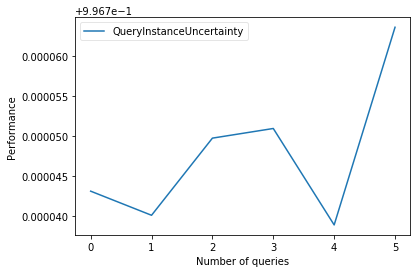

In [38]:
from alipy.experiment.al_experiment import AlExperiment

al = AlExperiment(x_train.to_numpy(), y_train.to_numpy().ravel(), stopping_criteria='num_of_queries', stopping_value=5,)
al.split_AL()
al.set_query_strategy(strategy="QueryInstanceUncertainty", measure='least_confident')
al.set_performance_metric('accuracy_score')
al.start_query(multi_thread=True)
al.plot_learning_curve()